In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
%cd /content/drive/MyDrive/STECH/test_demo
os.getcwd()

/content/drive/MyDrive/STECH/test_demo


'/content/drive/MyDrive/STECH/test_demo'

In [ ]:
!pip install google-cloud-speech
!pip install google-cloud-storage
!pip install pydub
!pip install speechbrain
!pip install pyannote.audio==2.0.1
!pip install pyannote.core
!pip install underthesea
!pip install python-docx
!pip install torchvision==0.12.0 torchtext==0.12.0 torchaudio==0.11.0
!pip install --upgrade google-cloud-bigquery
!pip install --upgrade google-api-python-client
!pip install --upgrade google-api-core
!pip install --upgrade google-cloud-vision

In [4]:
from Process_Function import *
from Function.write_txt import *
from time import time
import shutil

Downloading:   0%|          | 0.00/598 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/318 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [5]:
# Phần ghép các Function
Audio_Input = 'Input/Recording.wav'
if 'wav' not in Audio_Input:
    Audio_wav = Audio_Input.replace('.m4a','.wav')
    if os.path.exists(Audio_wav):
        os.remove(Audio_wav)
    Audio = AudioSegment.from_file(Audio_Input,'m4a')
    Audio.export(Audio_wav,'wav')
    Audio_Input = Audio_wav

Thu_muc_cho_audio_cat_theo_giong_noi = 'Splited_speaker'
Thu_muc_cho_audio_cat_theo_silence   = 'Splited_Silence'
Name = Audio_Input.split('/')[-1]
if os.path.exists(Thu_muc_cho_audio_cat_theo_giong_noi + '/' +Name.replace('.wav','')):
    shutil.rmtree(Thu_muc_cho_audio_cat_theo_giong_noi + '/' +Name.replace('.wav',''), ignore_errors=True)
if os.path.exists(Thu_muc_cho_audio_cat_theo_silence   + '/' +Name.replace('.wav','')):
    shutil.rmtree(Thu_muc_cho_audio_cat_theo_silence + '/' +Name.replace('.wav',''), ignore_errors=True)

In [6]:
Speaker,hashDict = Split_speaker(Audio_Input, time_ok=True)
# # write_Speaker_txt(Speaker,Audio_Input)
# write_Speaker_txt(hashDict,Audio_Input)

In [7]:
My_info = []
My_info_list = []
for audio,speaker in hashDict.items():
    my_dict,alist = split_silence(audio,speaker,silence_time=300)
    My_info.append(my_dict)
    My_info_list.append(alist)

In [ ]:
import librosa
import librosa.display

In [ ]:
audio_test = Thu_muc_cho_audio_cat_theo_giong_noi + '\\' + Audio_Input.split('/')[-1].replace('.wav','') + '\\0.wav'
audio_test

'Splited_speaker\\Recording\\0.wav'

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_test)

ValueError: ignored

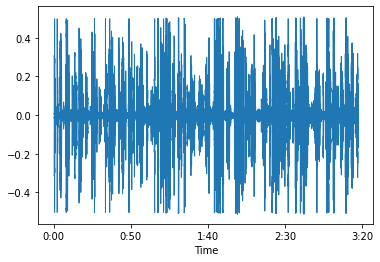

In [ ]:
samples, sampling_rate = librosa.load(audio_test)
def plot_wave(audio):
    y, sr = librosa.load(audio)
# trim silent edges
    whale_song, _ = librosa.effects.trim(y)
    librosa.display.waveshow(whale_song, sr=sr)
plot_wave(audio_test)

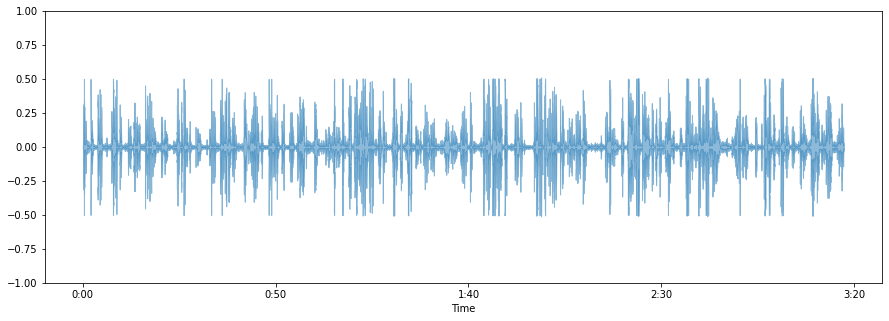

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,17))
plt.subplot(3,1,1)
librosa.display.waveshow(samples, alpha=0.5)
plt.ylim((-1,1))
plt.show()

In [8]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
import numpy as np
def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)  
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])
ae_debussy = amplitude_envelope(samples, FRAME_SIZE,HOP_LENGTH)
fancy_ae_debussy = fancy_amplitude_envelope(samples, FRAME_SIZE,HOP_LENGTH)

NameError: ignored

(-1.0, 1.0)

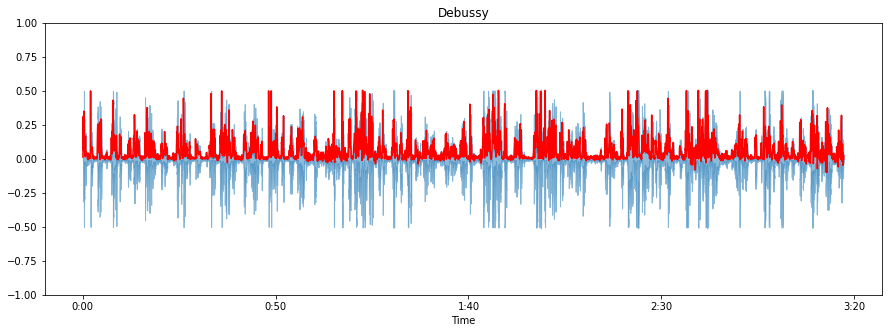

In [ ]:
frames = range(0, ae_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.figure(figsize=(15,17))
plt.subplot(3,1,1)
librosa.display.waveshow(samples, alpha=0.5)
plt.plot(t, ae_debussy, color="r")
plt.title("Debussy")
plt.ylim(-1,1)

In [ ]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

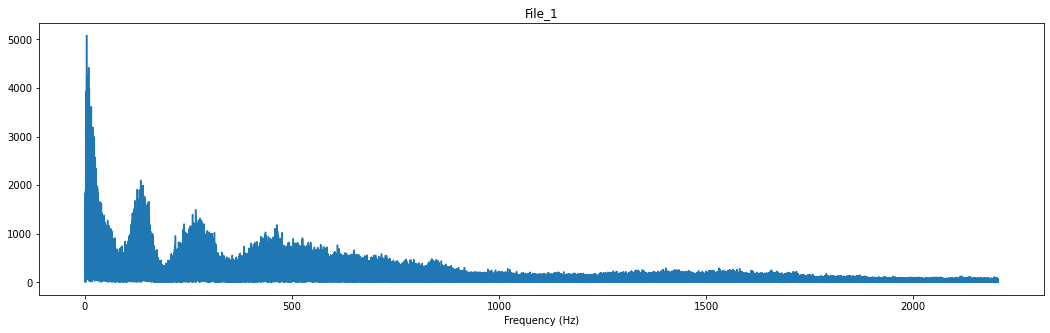

In [ ]:
plot_magnitude_spectrum(samples, sampling_rate, "File_1", 0.1)

Extracting short-time Fourier Transform

In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 512
samples, sampling_rate = librosa.load(audio_test)
S_scale = librosa.stft(samples, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_scale.shape

(1025, 8500)

In [ ]:
Y_scale = np.abs(S_scale) ** 2
Y_scale.shape

(1025, 8500)

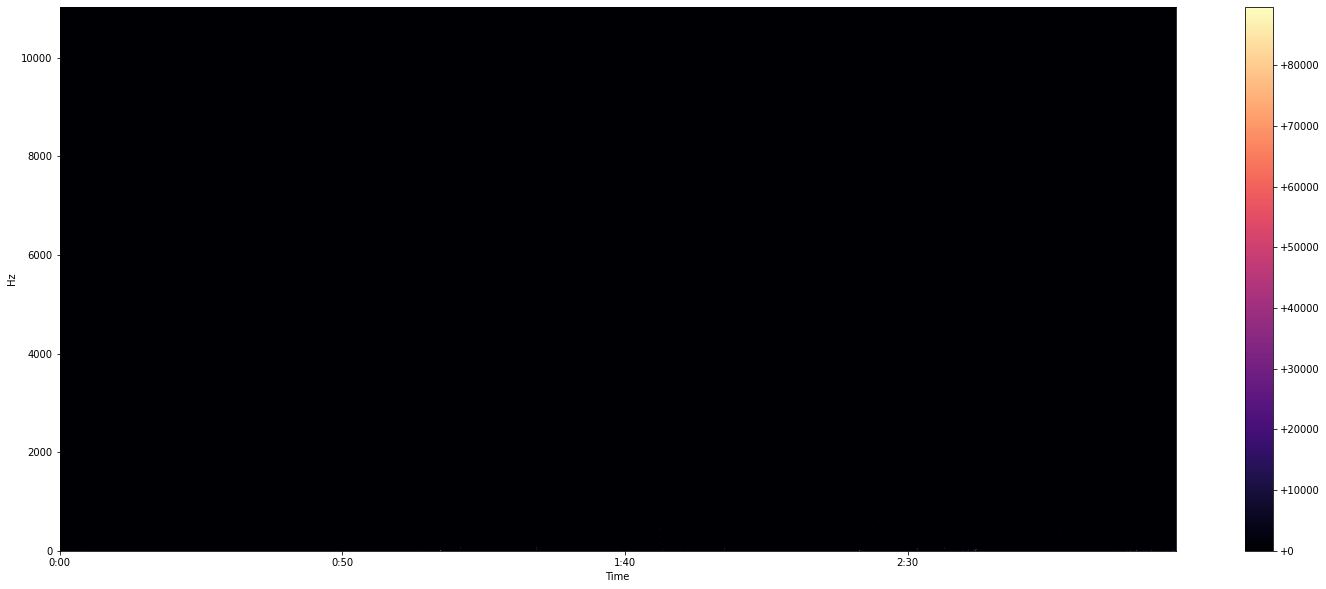

In [ ]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")
plot_spectrogram(Y_scale, sampling_rate, HOP_SIZE)

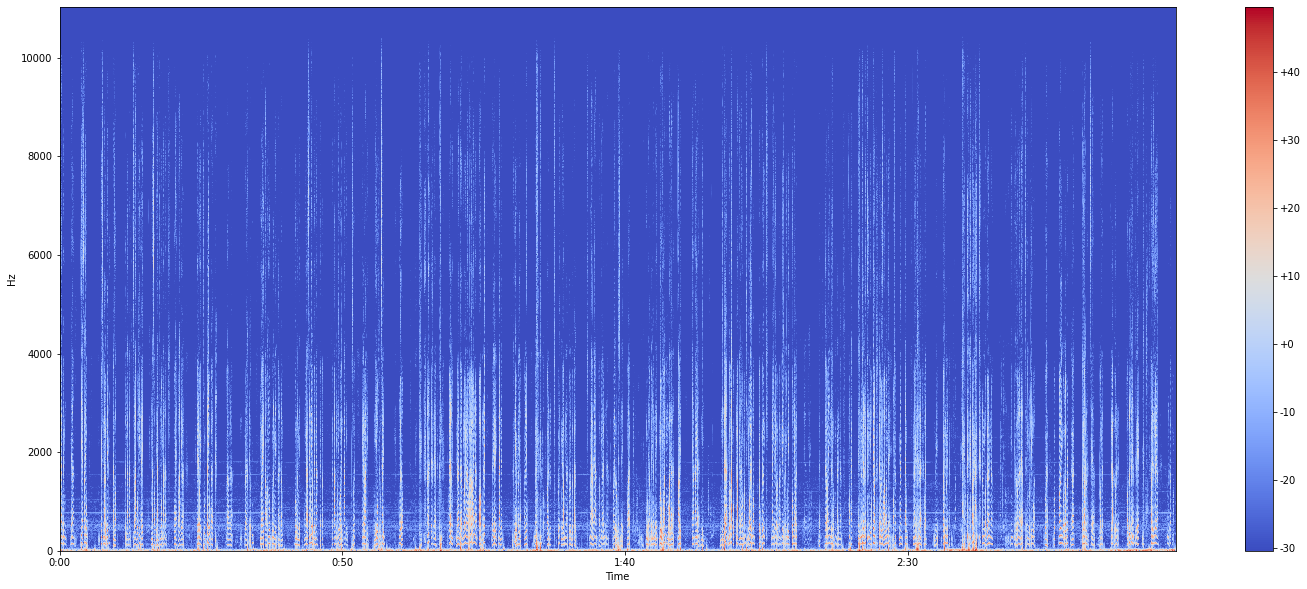

In [ ]:
#Log-Amplitude Spectrogram
# the way people perceived frequency is a logarithmic, not a linear
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sampling_rate, HOP_SIZE)

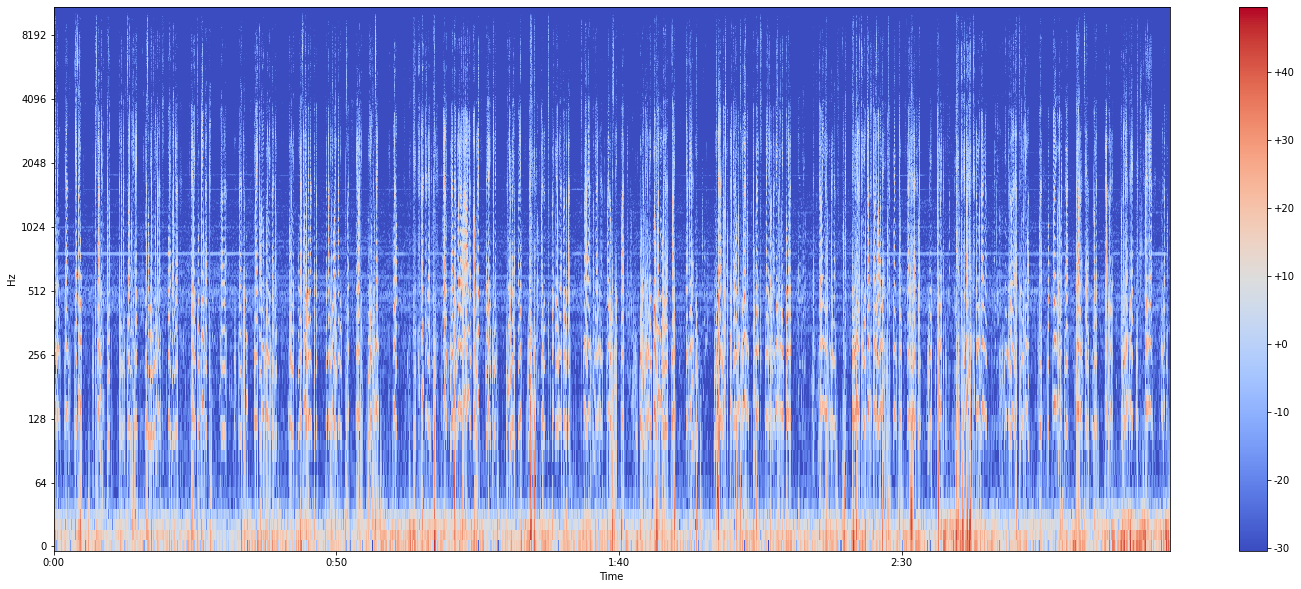

In [ ]:
#Log-Frequency Spectrogram
plot_spectrogram(Y_log_scale, sampling_rate, HOP_SIZE, y_axis="log")

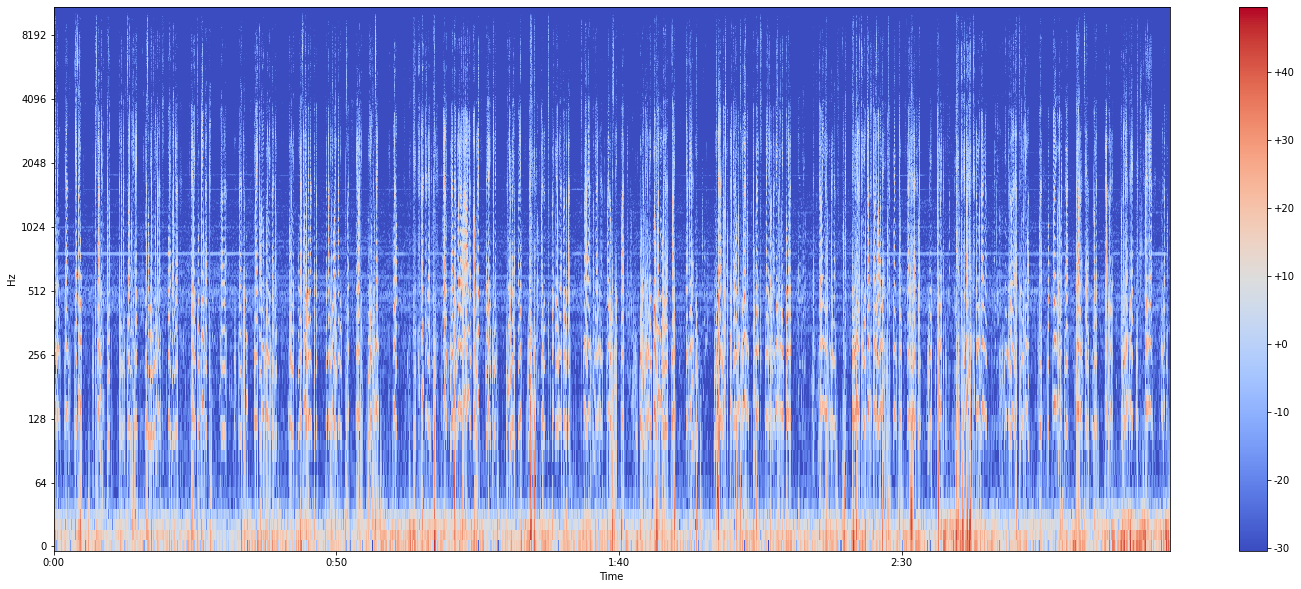

In [ ]:
S_debussy = librosa.stft(samples, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_debussy = librosa.power_to_db(np.abs(S_debussy) ** 2)
plot_spectrogram(Y_debussy, sampling_rate, HOP_SIZE, y_axis="log")

In [8]:
My_info = Process(My_info,My_info_list,time=20)
Text_Dict=GCP_s2t(My_info)
Result = Handle_Text_Dict(Text_Dict,XD=False)
# Result2 = Handle_Text_Dict(Text_Dict,S_Punc_ok=True)

Splited_Silence/Recording/0/file_1.wav


In [9]:
final_text=process_input(Result)

In [10]:
final_text

['Vô danh: Xin chào mình  vsmart  mình sinh ra ở miền Trung nắng đi Cát Bà gió Lào mỗi khi Hè Về  5 tháng sau t tăng 90 nóng là mùa hè gió Lào về  miền đất của mình rất nhiều người    khắc nghiệt của thiên nhiên mùa hè thì quá nóng còn muộn cũng ngon lành thì lại lại quá lạnh   Mỗi mùa lạnh đến chúng mình phải đặt xe 5 cây số từ nhà tới trường trường cấp 3 thì 5 cây số còn trường cấp 2 một cái số thôi trường cấp 2 thì cũng chỉ đi bộ chứ không có xe mà đi trong mưa gió trời rất lạnh thay đồ chúng tôi gọi là học 3 năm cấp 3 nhưng mà bỏ học cũng rất nhiều bởi vì chơi làng nơi  không dây nổi hoặc là di động Lê học về Hà Tĩnh với Quảng Bình là lũ lụt nhiều nhất cả nước máy mình ở nhà của mình là gần biển bao nhiêu nước lũ sẽ xuống biển hết không sao  mua Biển ở biển nhà gần biển một lũ thì không sao hết nhưng mà mua bảo để lại là toán  nhà Minh Đạt   trận chiến rất là nhiều phức tạp của cơn bão ngày 15 sẽ 10 có 10 cơn vào chỗ quê hương mình mạng nhà tù cặp đổ và người chết cũng rất nhiều bở

In [ ]:
Name = Audio_Input.split('/')[-1]
Name.replace('.wav','Xuong_dong')
downline(final_text)
Create_Word(Name,final_text)

In [12]:
# # Xem Thời gian cắt khoảng im lặng
# for i in My_info_list:
#     time = 0
#     for j in i:
#         time += j[2]-j[1]
#         print("{:7.3f} || {:^42}||{:^7.4f}||{:7.4f}||{}".format(time,j[0],j[2]-j[1],j[3]-j[4],j[5]))
#     #     print(j)
#     # print(i)

In [ ]:
# print(Text_Dict.keys())
# print('\nText_Dict[\'Speaker\']  :',Text_Dict['Speaker'][0:5])
# print('\nText_Dict[\'co dau\']   :',Text_Dict['co dau'][0:5])
# print('\nText_Dict[\'khong dau\']:',Text_Dict['khong dau'][0:5])
# print('\nText_Dict[\'silence\']  :',Text_Dict['silence'][0:5])
# print(Text_Dict['co dau'])

In [ ]:
## Kiểm tra Xuong dong
# for Speaker,codau,kdau,sil in zip(Text_Dict['Speaker'],Text_Dict['co dau'],Text_Dict['khong dau'],Text_Dict['silence']):
#     print("{:^10}||{}||{}".format(Speaker,sil,kdau))

In [ ]:
print(Result.keys())
print('\nResult[\'Speaker\']  :',Result['Speaker'][:])
print('\nResult[\'co dau\']   :',Result['co dau'][:])
print('\nResult[\'khong dau\']:',Result['khong dau'][:])
# with open('Result.txt','w+',encoding='utf-8') as f:
#     f.write(str(Result))

dict_keys(['Speaker', 'co dau', 'khong dau'])

Result['Speaker']  : ['SPEAKER_00', 'SPEAKER_02', 'SPEAKER_01', 'SPEAKER_00', 'SPEAKER_01', 'SPEAKER_00']

Result['co dau']   : ['Xin chào mình  vsmart  mình sinh ra ở miền Trung nắng đi Cát Bà gió Lào mỗi khi Hè Về  5 tháng sau t tăng 90 nóng là mùa hè gió Lào về  miền đất của mình rất nhiều người    khắc nghiệt của thiên nhiên mùa hè thì quá nóng còn muộn cũng ngon lành thì lại lại quá lạnh   Mỗi mùa lạnh đến chúng mình phải đặt xe 5 cây số từ nhà tới trường trường cấp 3 thì 5 cây số còn trường cấp 2 một cái số thôi trường cấp 2 thì cũng chỉ đi bộ chứ không có xe mà đi trong mưa gió trời rất lạnh thay đồ chúng tôi gọi là học 3 năm cấp 3 nhưng mà bỏ học cũng rất nhiều bởi vì chơi làng nơi  không dây nổi hoặc là di động Lê học về Hà Tĩnh với Quảng Bình là lũ lụt nhiều nhất cả nước máy mình ở nhà của mình là gần biển bao nhiêu nước lũ sẽ xuống biển hết không sao  mua Biển ở biển nhà gần biển một lũ thì không sao hết nhưng mà mua bảo để lại 

In [ ]:
# with open(r'D:\Work_Space\s2t_GCP_Pycharm\Result.txt','w+',encoding='utf-8') as f:
#     f.write(str(Result))

In [ ]:
final_text

['Vô danh: Xin chào mình  vsmart  mình sinh ra ở miền Trung nắng đi Cát Bà gió Lào mỗi khi Hè Về  5 tháng sau t tăng 90 nóng là mùa hè gió Lào về  miền đất của mình rất nhiều người    khắc nghiệt của thiên nhiên mùa hè thì quá nóng còn muộn cũng ngon lành thì lại lại quá lạnh   Mỗi mùa lạnh đến chúng mình phải đặt xe 5 cây số từ nhà tới trường trường cấp 3 thì 5 cây số còn trường cấp 2 một cái số thôi trường cấp 2 thì cũng chỉ đi bộ chứ không có xe mà đi trong mưa gió trời rất lạnh thay đồ chúng tôi gọi là học 3 năm cấp 3 nhưng mà bỏ học cũng rất nhiều bởi vì chơi làng nơi  không dây nổi hoặc là di động Lê học về Hà Tĩnh với Quảng Bình là lũ lụt nhiều nhất cả nước máy mình ở nhà của mình là gần biển bao nhiêu nước lũ sẽ xuống biển hết không sao  mua Biển ở biển nhà gần biển một lũ thì không sao hết nhưng mà mua bảo để lại là toán  nhà Minh Đạt   trận chiến rất là nhiều phức tạp của cơn bão ngày 15 sẽ 10 có 10 cơn vào chỗ quê hương mình mạng nhà tù cặp đổ và người chết cũng rất nhiều bở